In [2]:
#I added this
#%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

1.14.0


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import os
ROOT_DIR = os.path.abspath("../../")
ROOT_DIR

In [2]:
MODEL_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/Mask_RCNN"
MODEL_DIR

'D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/Mask_RCNN'

In [73]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import clothes

%matplotlib inline 

# Directory to save logs and trained model
#MODEL_DIR = os.path.join(ROOT_DIR, "/3. New_Deepfashion2_6_categories/Mask_RCNN")
MODEL_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/Mask_RCNN"


# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
#UPDATE THIS EVERY TIME!!!!
#BALLON_WEIGHTS_PATH = "/root/Mask-RCNN/logs/object20200602T1408/mask_rcnn_object_0030.h5"  # TODO: update this path

config = clothes.CustomConfig()
#CUSTOM_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/dataset"
#CUSTOM_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Evaluation/Images"
CUSTOM_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Validation Images"

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.5
    DETECTION_MAX_INSTANCES = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Load validation dataset
dataset = clothes.CustomDataset()
dataset.load_custom(CUSTOM_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))    




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [74]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
#weights_path =model.find_last()
weights_path ="D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Evaluation/Mask_RCNN/mask_rcnn_object_0074.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)    

Loading weights  D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Evaluation/Mask_RCNN/mask_rcnn_object_0074.h5


In [71]:
list=[45]

image ID: object.img_78_Shorts.jpg (45) D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Validation Images\val\img_78_Shorts.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    6.00000  max:    6.00000  int32
gt_bbox                  shape: (1, 4)                min:   42.00000  max: 1015.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


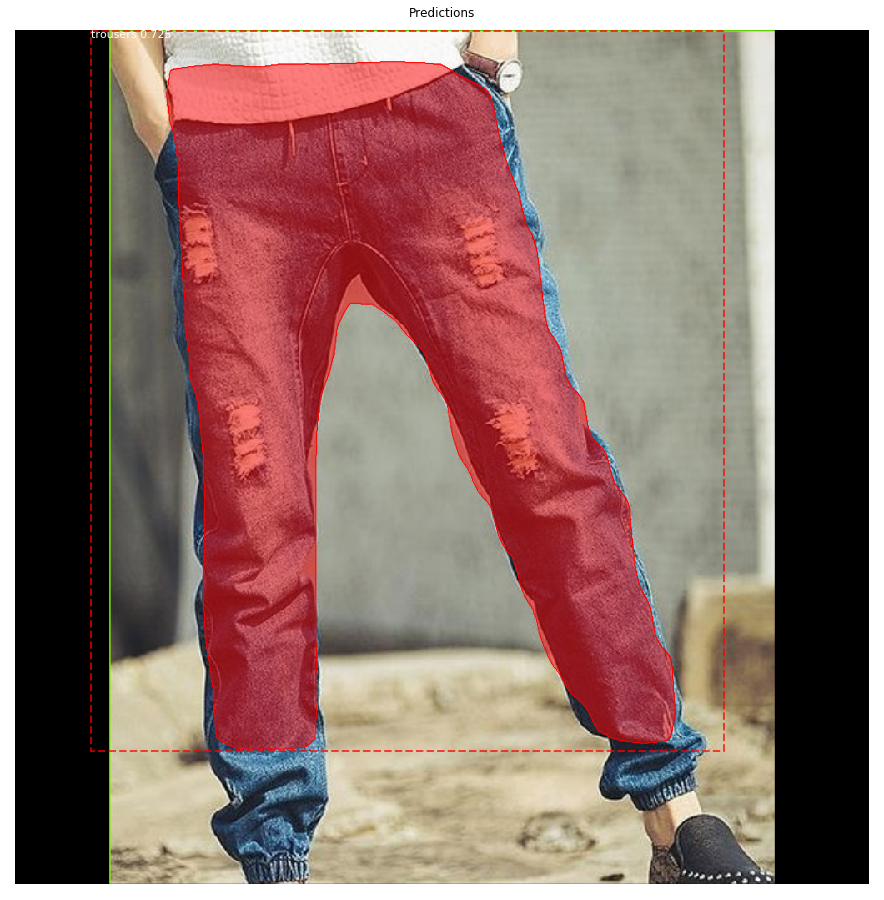

In [72]:
#image_ids = np.random.choice(dataset.image_ids, 1) 
image_ids = dataset.image_ids #use this for all the images
#for image_id in image_ids:
for i in list:
    image_id = i
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

  # Run object detection
    results = model.detect([image], verbose=1)

  # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'], ax=ax,
                              title="Predictions")
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)

In [77]:
list = [8]

image ID: object.012684.jpg (8) D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Validation Images\val\012684.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    6.00000  max:    6.00000  int32
gt_bbox                  shape: (1, 4)                min:   82.00000  max:  819.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


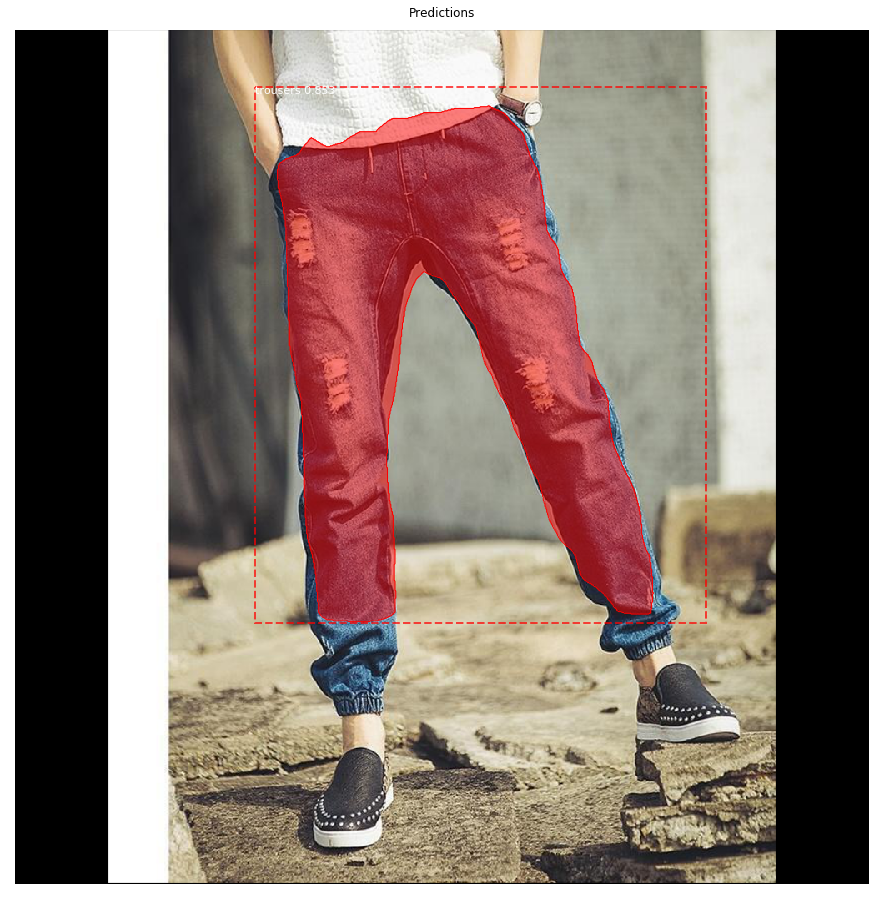

In [78]:
#image_ids = np.random.choice(dataset.image_ids, 1) 
image_ids = dataset.image_ids #use this for all the images
#for image_id in image_ids:
for i in list:
    image_id = i
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

  # Run object detection
    results = model.detect([image], verbose=1)

  # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'], ax=ax,
                              title="Predictions")
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)

In [298]:
#1

# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset.image_ids, 10)
#print(image_ids)
#image_ids = dataset.image_ids
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'],
                         iou_threshold=0.5)
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.1


In [4]:
# #2

# # Compute VOC-Style mAP @ IoU=0.5
# # Running on 10 images. Increase for better accuracy.
# image_ids = np.random.choice(dataset.image_ids, 10)
# #print(image_ids)
# #image_ids = dataset.image_ids
# APs = []
# for image_id in image_ids:
#     # Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#         modellib.load_image_gt(dataset, config,
#                                image_id, use_mini_mask=False)
#     molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
#     # Run object detection
#     results = model.detect([image], verbose=0)
#     r = results[0]
#     # Compute AP
#     AP, precisions, recalls, overlaps =\
#         utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
#                          r["rois"], r["class_ids"], r["scores"], r['masks'],
#                          iou_threshold=0.5)
#     APs.append(AP)
    
# print("mAP: ", np.mean(APs))

In [3]:
# #3

# # Compute VOC-Style mAP @ IoU=0.5
# # Running on 10 images. Increase for better accuracy.
# image_ids = np.random.choice(dataset.image_ids, 10)
# #print(image_ids)
# #image_ids = dataset.image_ids
# APs = []
# for image_id in image_ids:
#     # Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#         modellib.load_image_gt(dataset, config,
#                                image_id, use_mini_mask=False)
#     molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
#     # Run object detection
#     results = model.detect([image], verbose=0)
#     r = results[0]
#     # Compute AP
#     AP, precisions, recalls, overlaps =\
#         utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
#                          r["rois"], r["class_ids"], r["scores"], r['masks'],
#                          iou_threshold=0.5)
#     APs.append(AP)
    
# print("mAP: ", np.mean(APs))

In [2]:
# #4

# # Compute VOC-Style mAP @ IoU=0.5
# # Running on 10 images. Increase for better accuracy.
# image_ids = np.random.choice(dataset.image_ids, 10)
# #print(image_ids)
# #image_ids = dataset.image_ids
# APs = []
# for image_id in image_ids:
#     # Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#         modellib.load_image_gt(dataset, config,
#                                image_id, use_mini_mask=False)
#     molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
#     # Run object detection
#     results = model.detect([image], verbose=0)
#     r = results[0]
#     # Compute AP
#     AP, precisions, recalls, overlaps =\
#         utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
#                          r["rois"], r["class_ids"], r["scores"], r['masks'],
#                          iou_threshold=0.5)
#     APs.append(AP)
    
# print("mAP: ", np.mean(APs))

In [1]:
# #5

# # Compute VOC-Style mAP @ IoU=0.5
# # Running on 10 images. Increase for better accuracy.
# image_ids = np.random.choice(dataset.image_ids, 10)
# #print(image_ids)
# #image_ids = dataset.image_ids
# APs = []
# for image_id in image_ids:
#     # Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#         modellib.load_image_gt(dataset, config,
#                                image_id, use_mini_mask=False)
#     molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
#     # Run object detection
#     results = model.detect([image], verbose=0)
#     r = results[0]
#     # Compute AP
#     AP, precisions, recalls, overlaps =\
#         utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
#                          r["rois"], r["class_ids"], r["scores"], r['masks'],
#                          iou_threshold=0.5)
#     APs.append(AP)
    
# print("mAP: ", np.mean(APs))

In [83]:
import time
start = time.time()

In [84]:
#WHOLE

# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
#image_ids = np.random.choice(dataset.image_ids, 10)
#print(image_ids)
image_ids = dataset.image_ids
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'],
                         iou_threshold=0.75)
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.0


In [85]:
print((time.time() - start)/60)

7.933841065565745


# **Code to check the results on any given image**

In [56]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import clothes

%matplotlib inline 

# Directory to save logs and trained model
#MODEL_DIR = os.path.join(ROOT_DIR, "/3. New_Deepfashion2_6_categories/Mask_RCNN")
MODEL_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/Mask_RCNN"


# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
#UPDATE THIS EVERY TIME!!!!
#BALLON_WEIGHTS_PATH = "/root/Mask-RCNN/logs/object20200602T1408/mask_rcnn_object_0030.h5"  # TODO: update this path

config = clothes.CustomConfig()
#CUSTOM_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/3. New_Deepfashion2_6_categories/dataset"
CUSTOM_DIR = "D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Evaluation/Images"

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.7
    DETECTION_MAX_INSTANCES = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
#weights_path =model.find_last()
weights_path ="D:/DCU/Practicum/Datasets/DeepFashion2/Mask RCNN/Clothes/Dataset Splits/Evaluation/Mask_RCNN/mask_rcnn_object_0074.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True) 


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [45]:
class_names = ['BG', 'short sleeve top','long sleeve top', 'dress', 'skirt', 'shorts','trousers']

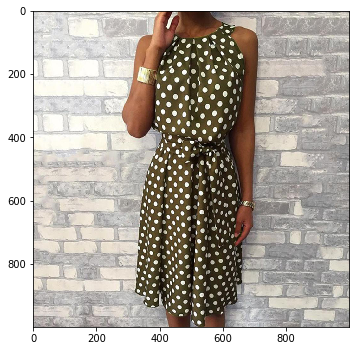

In [57]:
# Load a random image from the images folder
import skimage.io
image = skimage.io.imread(r'D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\Dataset Splits\Validation Images\val\5.jpg')

# original image
plt.figure(figsize=(5,5))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (1000, 1000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


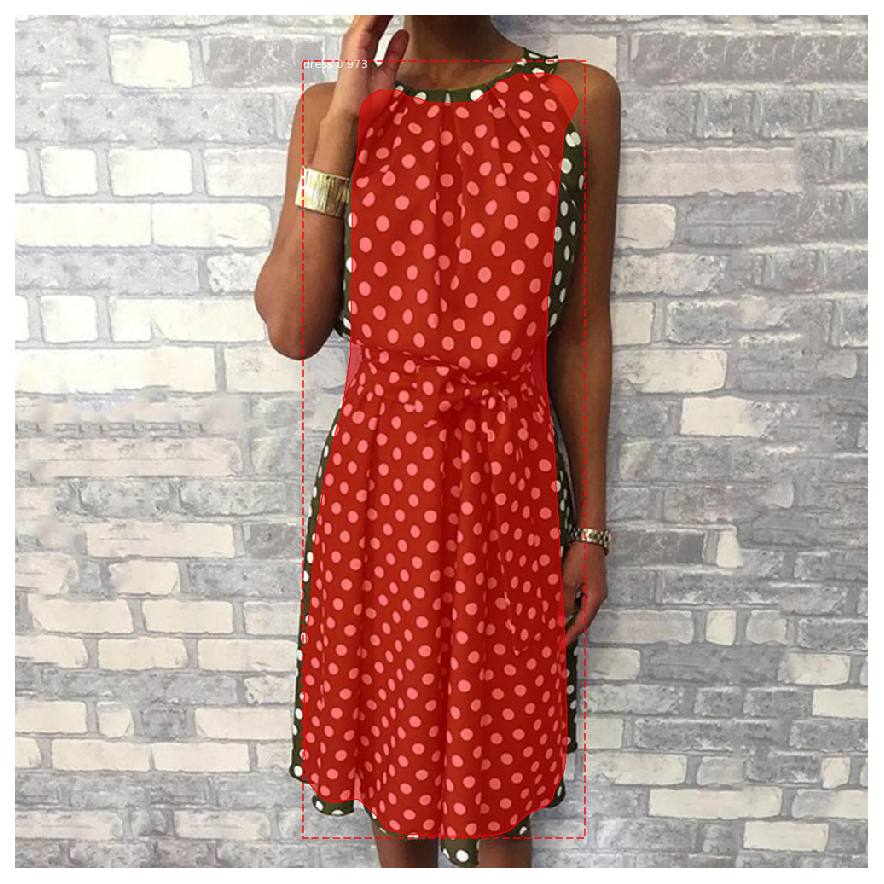

In [58]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])